In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import load_model

df = pd.read_csv('C:\\Users\\kasun\\Downloads\\flaskProject\\Datasets\\revenueTotal.csv',index_col='date',parse_dates=True)
print(df)

            totalRevenue
date                    
1990-01-01      15091189
1990-02-01      13514792
1990-03-01      13626535
1990-04-01      13022717
1990-05-01      13440270
...                  ...
2020-03-01      29330842
2020-04-01      26887144
2020-05-01      28328517
2020-06-01      34591626
2020-07-01      41737555

[367 rows x 1 columns]


In [147]:
# df = pd.read_csv('AK.csv',index_col='date',parse_dates=True)
df.index.freq='MS'

In [148]:
df.head()

,totalRevenue
date,
1990-01-01,15091189
1990-02-01,13514792
1990-03-01,13626535
1990-04-01,13022717
1990-05-01,13440270


<AxesSubplot:xlabel='date'>

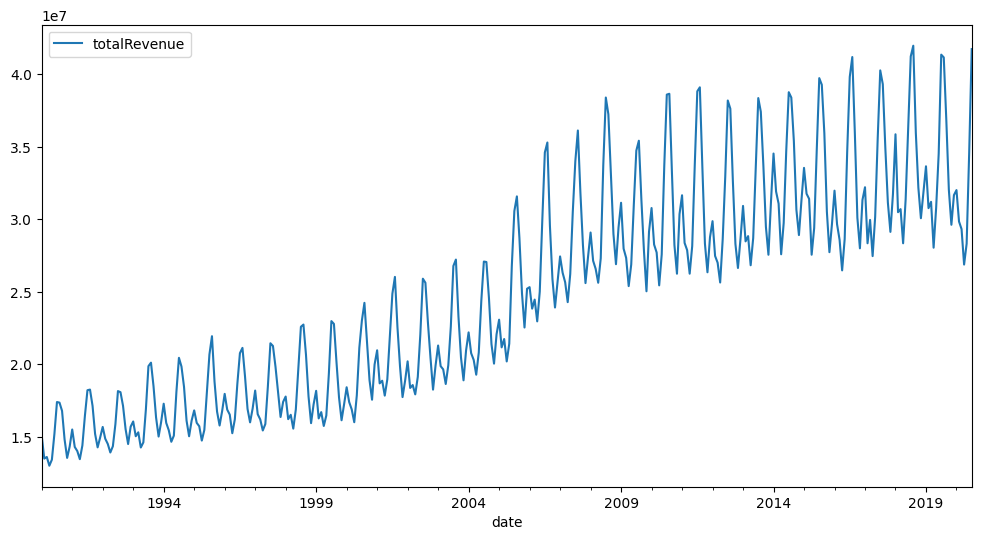

In [149]:
df.plot(figsize=(12,6))

In [150]:
from statsmodels.tsa.seasonal import seasonal_decompose

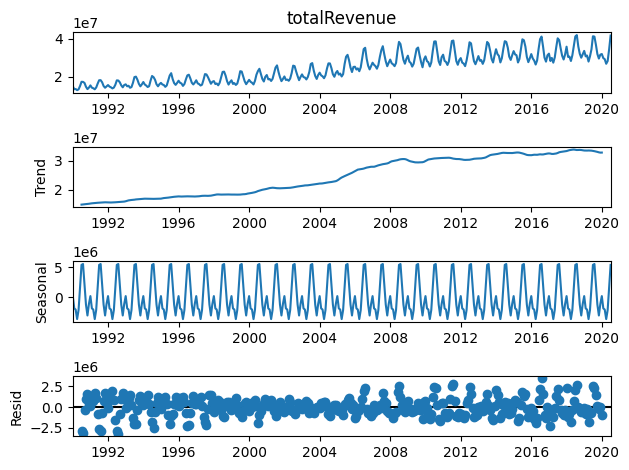

In [151]:
results = seasonal_decompose(df['totalRevenue'])
results.plot();

In [152]:
len(df)

367

In [153]:
train = df.iloc[:300]
test = df.iloc[300:]

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [155]:
df.head(),df.tail()

(            totalRevenue
 date                    
 1990-01-01      15091189
 1990-02-01      13514792
 1990-03-01      13626535
 1990-04-01      13022717
 1990-05-01      13440270,
             totalRevenue
 date                    
 2020-03-01      29330842
 2020-04-01      26887144
 2020-05-01      28328517
 2020-06-01      34591626
 2020-07-01      41737555)

In [156]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [157]:
scaled_train[:10]
print(df.dtypes)

totalRevenue    int64
dtype: object


In [158]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [159]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [160]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07930907 0.01886707 0.02315151 0.         0.01600976 0.08458771
 0.16834743 0.1666967  0.14496871 0.06917681 0.02062152 0.05064163]
Predict this y: 
 [[0.09570984]]


In [161]:
X.shape

(1, 12, 1)

In [162]:

n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
# val_generator = TimeseriesGenerator(scaled_test, scaled_test, length=n_input, batch_size=1)


In [163]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [164]:
# define model

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(LSTM(200, activation='relu',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [165]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 12, 200)           161600    
                                                                 
 lstm_9 (LSTM)               (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 482,601
Trainable params: 482,601
Non-trainable params: 0
_________________________________________________________________


In [166]:
# fit model
model.fit(generator,epochs=40)
# history = model.fit(generator, epochs=40, validation_data=val_generator)

Epoch 1/40
288/288 [==============================] - 4s 6ms/step - loss: 0.0271
Epoch 2/40
288/288 [==============================] - 2s 5ms/step - loss: 0.0219
Epoch 3/40
288/288 [==============================] - 2s 5ms/step - loss: 0.0164
Epoch 4/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0120
Epoch 5/40
288/288 [==============================] - 2s 8ms/step - loss: 0.0101
Epoch 6/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0075
Epoch 7/40
288/288 [==============================] - 2s 5ms/step - loss: 0.0046
Epoch 8/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0037
Epoch 9/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0034
Epoch 10/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0031
Epoch 11/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0028
Epoch 12/40
288/288 [==============================] - 2s 6ms/step - loss: 0.0027
Epoch 13/40
288/288 [====

Text(0, 0.5, 'Loss')

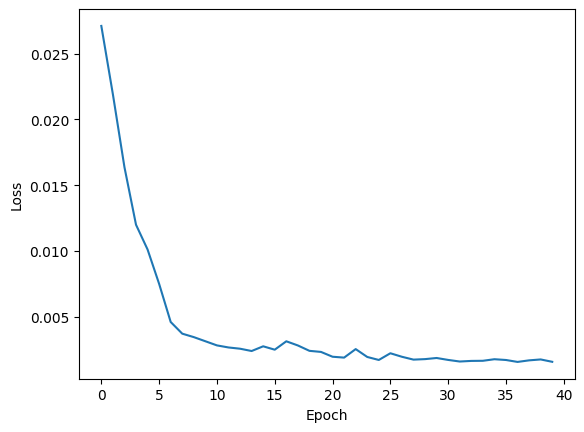

In [167]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [131]:
# history = model.fit(generator, epochs=40, validation_data=val_generator)
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']
# plt.plot(train_loss, label='train_loss')
# plt.plot(val_loss, label='val_loss')
# plt.legend()
# plt.show()

In [132]:
last_train_batch = scaled_train[-12:]

In [133]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [134]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 173ms/step


array([[0.774303]], dtype=float32)

In [135]:
scaled_test[0]

array([0.78711136])

In [136]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


In [137]:
test_predictions

[array([0.774303], dtype=float32),
 array([0.73198617], dtype=float32),
 array([0.66374135], dtype=float32),
 array([0.5648266], dtype=float32),
 array([0.6170835], dtype=float32),
 array([0.78228563], dtype=float32),
 array([0.91061157], dtype=float32),
 array([0.90030646], dtype=float32),
 array([0.7985814], dtype=float32),
 array([0.66173565], dtype=float32),
 array([0.59144527], dtype=float32),
 array([0.6558508], dtype=float32),
 array([0.73741066], dtype=float32),
 array([0.7333575], dtype=float32),
 array([0.6593557], dtype=float32),
 array([0.5692643], dtype=float32),
 array([0.6014479], dtype=float32),
 array([0.74708784], dtype=float32),
 array([0.8648873], dtype=float32),
 array([0.8624722], dtype=float32),
 array([0.7707137], dtype=float32),
 array([0.6501824], dtype=float32),
 array([0.578364], dtype=float32),
 array([0.6233474], dtype=float32),
 array([0.7091871], dtype=float32),
 array([0.7314571], dtype=float32),
 array([0.66524696], dtype=float32),
 array([0.5762019], 

In [138]:
test.head()

,totalRevenue
date,
2015-01-01,33551488
2015-02-01,31768126
2015-03-01,31419315
2015-04-01,27565620
2015-05-01,29405374


In [139]:
true_predictions = scaler.inverse_transform(test_predictions)

In [140]:
test['Predictions'] = true_predictions

C:\Users\kasun\AppData\Local\Temp\ipykernel_38252\2515899287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

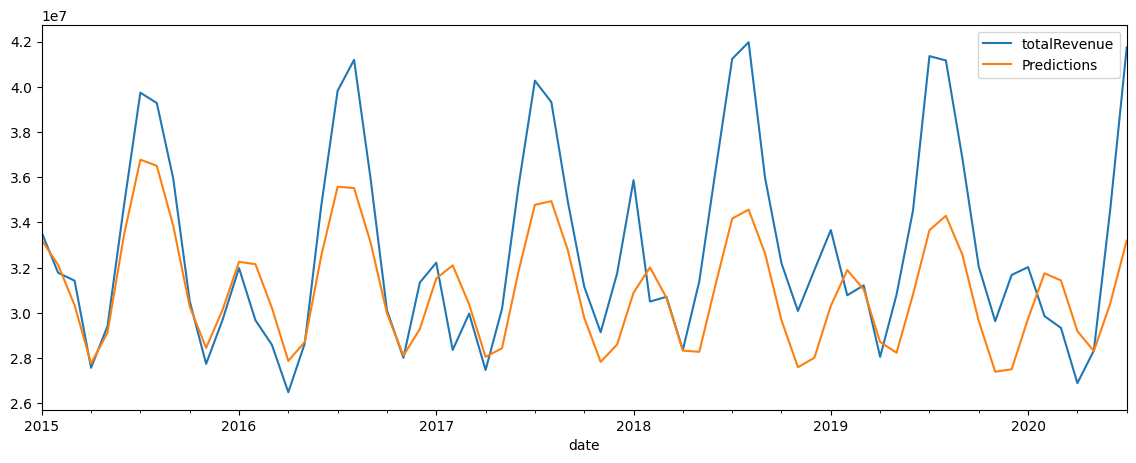

In [141]:
test.plot(figsize=(14,5))

In [142]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(test['totalRevenue'],test['Predictions']))
mse = mean_squared_error(test['totalRevenue'],test['Predictions'])
r2 = r2_score(test['totalRevenue'],test['Predictions'])

print("R-squared:", r2)
print(rmse)
print(mse)

mape = np.mean(np.abs((test['totalRevenue'] -test['Predictions'])  / test['totalRevenue'])) * 100

print("Mean Absolute Percentage Error:", mape)
actual_mean = test['totalRevenue'].mean()
accuracy = (1 - rmse / actual_mean) * 100
print(f"The accuracy of the model is {accuracy:.2f}%")


R-squared: 0.4247689557562424
3241520.1542343325
10507452910307.371
Mean Absolute Percentage Error: 7.094523401216549
The accuracy of the model is 90.12%


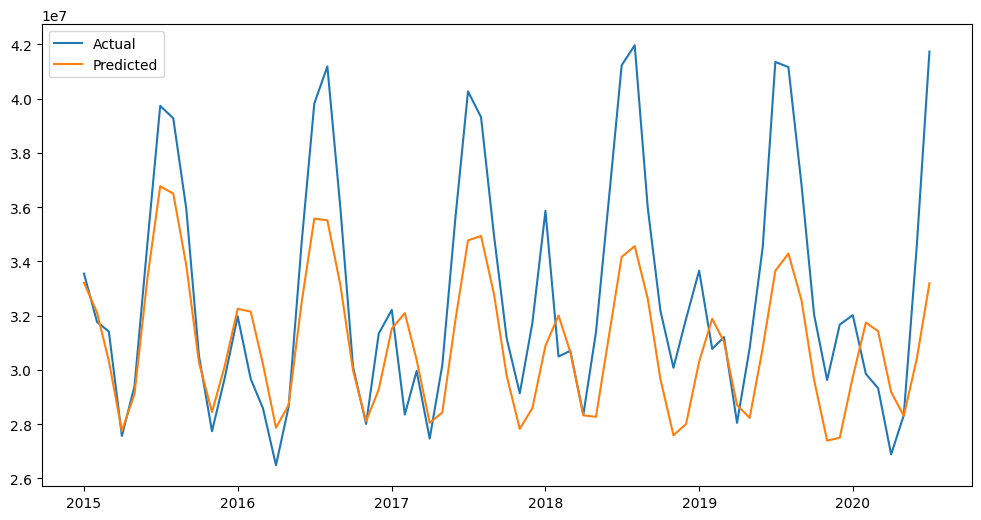

In [143]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['totalRevenue'], label='Actual')
plt.plot(test.index, test['Predictions'], label='Predicted')
plt.legend()
plt.show()


In [144]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# calculate sMAPE
n = len(test)
smape = (1/n) * np.sum(2 * np.abs(test['Predictions'] - test['totalRevenue']) / (np.abs(test['Predictions']) + np.abs(test['totalRevenue']))) * 100
print(f'sMAPE: {smape:.2f}%')

# calculate MAPE
mape = np.mean(np.abs(test['Predictions'] - test['totalRevenue']) / np.abs(test['totalRevenue'])) * 100
print(f'MAPE: {mape:.2f}%')

# calculate MAE
mae = mean_absolute_error(test['totalRevenue'], test['Predictions'])
print(f'MAE: {mae:.2f}')

# calculate RMSE
rmse = np.sqrt(np.mean((test['Predictions'] - test['totalRevenue'])**2))
print(f'RMSE: {rmse:.2f}')

# calculate RMSE percentage
rmse_perc = (rmse / np.mean(test['totalRevenue'])) * 100
print(f'RMSE percentage: {rmse_perc:.2f}%')


sMAPE: 7.43%
MAPE: 7.09%
MAE: 2487411.60
RMSE: 3241520.15
RMSE percentage: 9.88%


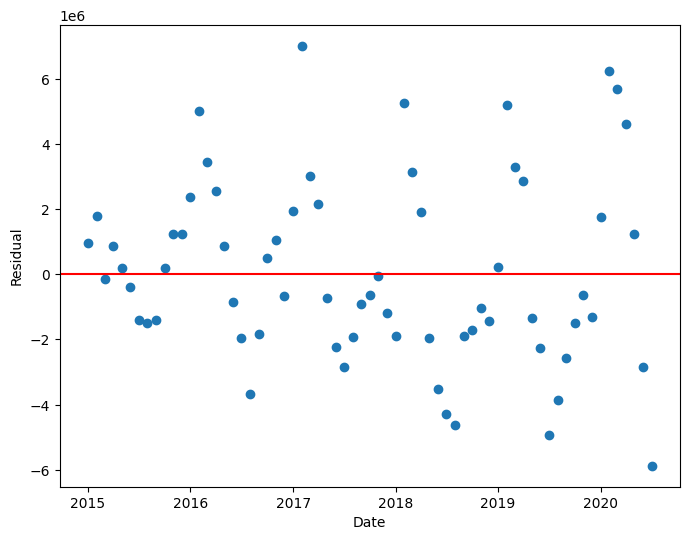

In [277]:
residuals = test['Predictions'] - test['totalRevenue']
plt.figure(figsize=(8,6))
plt.scatter(test.index, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()


In [50]:
# save the model to disk
model.save('Revenue_Model.h5')


In [51]:
from tensorflow.python.keras.models import model_from_json

# Save the model's architecture as a JSON file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model's weights as an HDF5 file
model.save_weights("model_weights.h5")

# Load the model's architecture from the JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model's weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

# Compile the loaded model before using it
loaded_model.compile(optimizer='adam', loss='mse')


In [52]:
import numpy as np
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
# Load the model's architecture from the JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model's weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

# Compile the loaded model before using it
loaded_model.compile(optimizer='adam', loss='mse')

# Define the 12 past month values
past_data = [31339465,32216079,28354187,29965163,27469754,30176368,35585347,40269224,39320309,34929664,31157491,29139490,31739196]
# Reshape the example data into a 2D array with one column
example_data = np.array(past_data).reshape(-1, 1)
# create the scaler object
scaler = MinMaxScaler()

# fit the scaler object on the training data
scaler.fit(example_data)

# transform the training and testing data using the fitted scaler
scaled_test = scaler.transform(example_data)


# Generate a sequence of input data for the model to make a prediction on
n_input = 12
generator = TimeseriesGenerator(scaled_test, scaled_test, length=12, batch_size=1)
# Get the input sequence for the first batch
X, y = generator[0]

# Reshape the data to match the input shape of the model
X = X.reshape((1, 12, 1))

# Make a prediction using the loaded model
prediction = loaded_model.predict(X)

# Inverse transform the prediction to get the actual scale
actual_prediction = scaler.inverse_transform(prediction)

print("Prediction:", actual_prediction[0][0])


1/1 [==============================] - 0s 434ms/step
Prediction: 33013208.0


In [48]:
import numpy as np
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler

# Load the model's architecture from the JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model's weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

# Compile the loaded model before using it
loaded_model.compile(optimizer='adam', loss='mse')

# Define the past month values for which we want to make a prediction
past_data = [31339465, 32216079, 28354187, 29965163, 27469754, 30176368, 35585347, 40269224, 39320309, 34929664, 31157491, 29139490, 31739196]

# Reshape the example data into a 2D array with one column
example_data = np.array(past_data).reshape(-1, 1)

# Create a MinMaxScaler object to scale the data between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler object on the example data
scaler.fit(example_data)

# Transform the example data using the fitted scaler
scaled_example_data = scaler.transform(example_data)

# Generate a sequence of input data for the model to make a prediction on
n_input = 12
generator = TimeseriesGenerator(scaled_example_data, scaled_example_data, length=n_input, batch_size=1)

# Get the input sequence for the first batch
X, y = generator[0]

# Reshape the data to match the input shape of the model
X = X.reshape((1, n_input, 1))

# Make a prediction using the loaded model
prediction = loaded_model.predict(X)

# Inverse transform the prediction to get the actual scale
actual_prediction = scaler.inverse_transform(prediction)

# Print the predicted value
print("Prediction:", actual_prediction[0][0])


1/1 [==============================] - 0s 352ms/step
Prediction: 33013208.0


In [49]:
import numpy as np
from keras.models import model_from_json
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd

# Load the model's architecture from the JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model's weights from the HDF5 file
loaded_model.load_weights("model_weights.h5")

# Compile the loaded model before using it
loaded_model.compile(optimizer='adam', loss='mse')

# Load the data from a CSV file
data = pd.read_csv("new_dataset02.csv")

# Extract the last 12 months of data from the DataFrame
last_12_months = data.tail(13)["totalRevenue"].tolist()

# Reshape the data into a 2D array with one column
data_array = np.array(last_12_months).reshape(-1, 1)

# Create a MinMaxScaler object to scale the data between 0 and 1
scaler = MinMaxScaler()

# Fit the scaler object on the data
scaler.fit(data_array)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(data_array)

# Generate a sequence of input data for the model to make a prediction on
n_input = 12
generator = TimeseriesGenerator(scaled_data, scaled_data, length=n_input, batch_size=1)

# Get the input sequence for the first batch
X, y = generator[0]

# Reshape the data to match the input shape of the model
X = X.reshape((1, n_input, 1))

# Make a prediction using the loaded model
prediction = loaded_model.predict(X)

# Inverse transform the prediction to get the actual scale
actual_prediction = scaler.inverse_transform(prediction)

# Print the predicted value
print("Prediction:", actual_prediction[0][0])
# 2020-08-01,40421937

1/1 [==============================] - 0s 412ms/step
Prediction: 40763120.0
